In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [2]:
# data grabbing
data = pd.read_csv('NASCOTUS_fixed.csv')
X = data.drop('justicesDecision', axis=1)
y = data['justicesDecision']

In [3]:
# 1 hot encode alllllll categorical features
categorical_features = X.columns.tolist()  # All features are categorical
column_transformer = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical_features)
], remainder='passthrough')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['lawType',
                                                   'lcDispositionDirection',
                                                   'certReason',
                                                   'presAffiliation'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                                        random_state=10))])

Accuracy: 0.49918230667393504
Confusion Matrix:
 [[4926 5502]
 [ 929 1484]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.47      0.61     10428
           1       0.21      0.62      0.32      2413

    accuracy                           0.50     12841
   macro avg       0.53      0.54      0.46     12841
weighted avg       0.72      0.50      0.55     12841



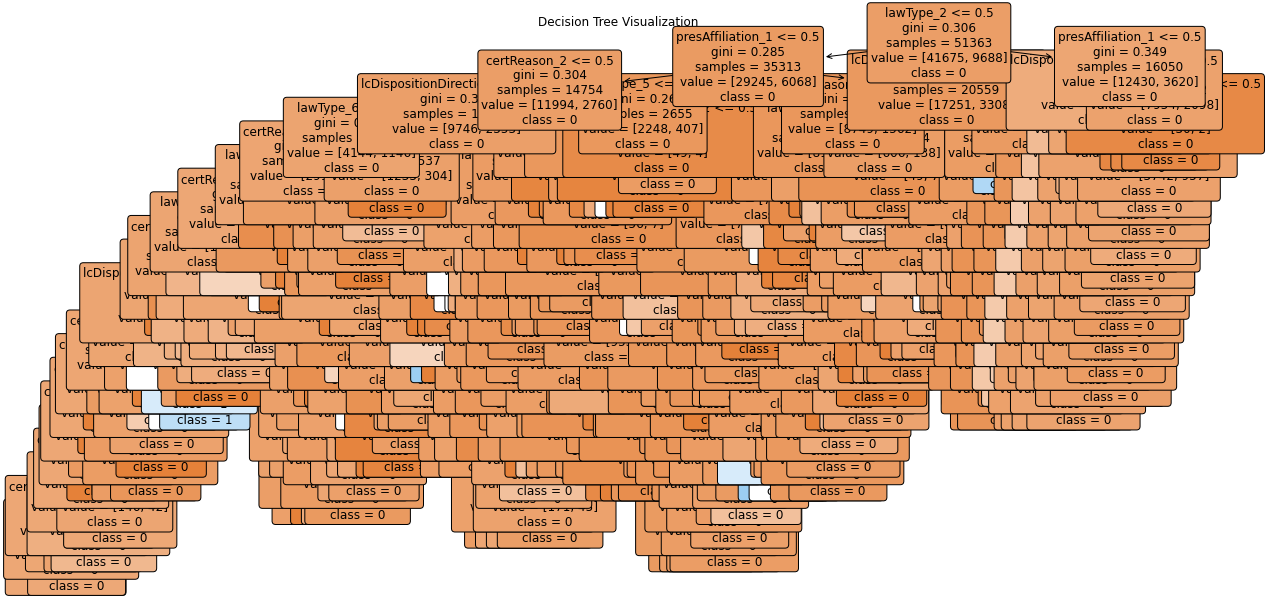

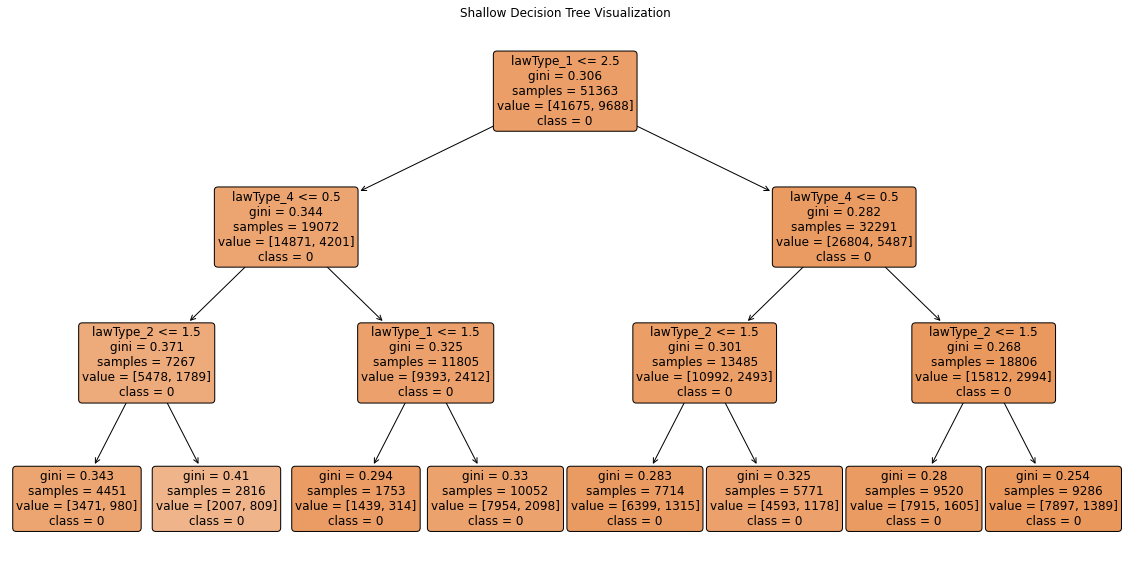